In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import plot_chr_in_splits, load_annotations, get_labels, plot_seq_overlap
import os

TASK = 'chromatin_accessibility'
LABEL_DEPTH = 125

In [2]:
annotations = load_annotations(TASK)
annotations

,chromosome,start,end,score,-,strand,label,split
0,13,19144364,19144876,.,1,+,4,train
1,13,19168839,19169351,.,1,+,72,train
2,13,19170044,19170556,.,1,+,25,train
3,13,19172161,19172673,.,1,+,"2,8,10,21,26,29,48,118",train
4,13,19172651,19173163,.,1,+,"0,2,21,22,24,36,38,116,121",train
...,...,...,...,...,...,...,...,...
2062124,17,81185397,81185909,.,1,+,"42,44,47,55,58,59,61,65,66,73,79,82,84,86,88,9...",train
2062125,17,81188729,81189241,.,1,+,"95,117,118",train
2062126,17,81189569,81190081,.,1,+,"117,118",train
2062127,17,81190044,81190556,.,1,+,"103,117,118,122",train


In [3]:
annotations['split'].value_counts()/len(annotations)*100

split
train    68.402801
test     18.047028
valid    13.550171
Name: count, dtype: float64

In [4]:
annotations['length'] = annotations['end'] - annotations['start']
annotations['length'].describe()

count    2062129.0
mean         512.0
std            0.0
min          512.0
25%          512.0
50%          512.0
75%          512.0
max          512.0
Name: length, dtype: float64

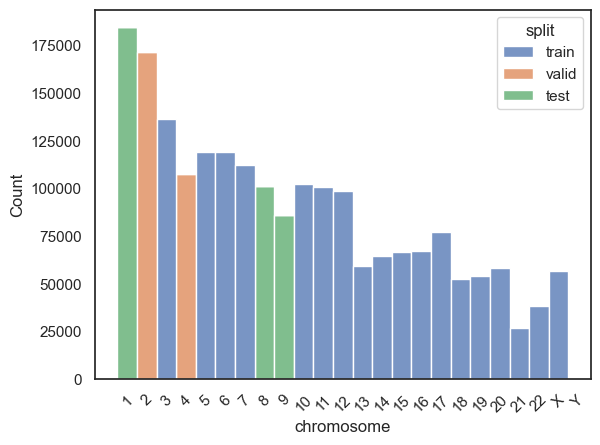

In [5]:
plot_chr_in_splits(annotations)

Number of annotations with overlaps: 399001.0
Total number of samples: 1410554
Percentage of annotations with overlaps: 28.29%


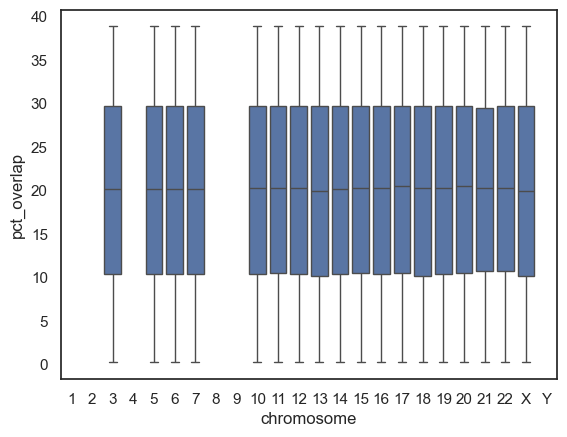

In [6]:
train_annotations = annotations[annotations['split'] == 'train'].copy()

overlap = plot_seq_overlap(train_annotations)

In [7]:
overlap.describe()

,length,overlap,pct_overlap
count,399001.0,399001.000000,399001.000000
mean,512.0,102.454167,20.010579
std,0.0,57.024438,11.137586
min,512.0,1.000000,0.195312
25%,512.0,53.000000,10.351562
50%,512.0,104.000000,20.312500
75%,512.0,152.000000,29.687500
max,512.0,199.000000,38.867188


In [ ]:
labels_df, total_labels = get_labels(annotations, LABEL_DEPTH)
total_labels